To create meaningful visualizations using the dataset provided, we can focus on a few columns that can provide insights through line and area charts. Let's consider the following columns:

Population - To observe changes in population density or compare population sizes across countries.
GDP - To analyze economic size and growth across countries.

Life Expectancy - To explore health outcomes and quality of life.

CO2 Emissions - To study environmental impact and contribution to global emissions.

Using these columns, we can create the following visualizations:

Line Chart: Compare the GDP of selected countries to observe economic trends.

Area Chart: Show the cumulative CO2 emissions to understand the contribution to global emissions over selected countries.

To create a treemap chart and a waterfall chart using your dataset in Google Colab, we can focus on the following columns:

Treemap Chart: A treemap chart is useful for visualizing hierarchical data. We can use the columns related to GDP and Population. This will help us see the relative size of each country's economy compared to its population size.

Waterfall Chart: A waterfall chart is useful for understanding the cumulative effect of sequentially introduced positive or negative values. We can use GDP and CO2 Emissions to explore the impact of emissions on GDP or vice versa.

To plot a donut chart and a funnel chart using the dataset in Google Colab, we can use the following approaches:

Donut Chart: A donut chart is useful for showing proportions of categorical data. We can use the column GDP to show the proportion of GDP for a selection of countries.

Funnel Chart: A funnel chart is useful for visualizing a process that has stages and understanding the conversion rates across those stages. We can use Population for a selection of countries to simulate a funnel-like representation.

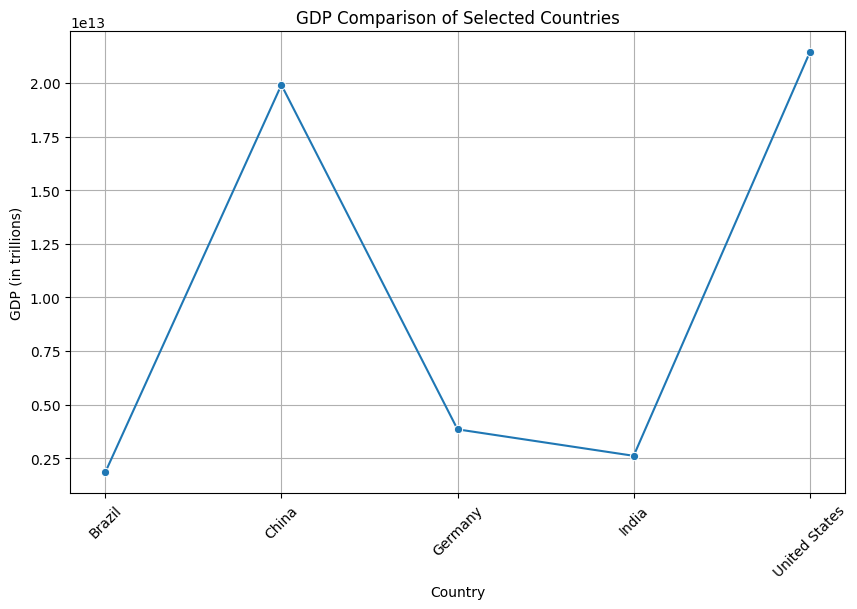

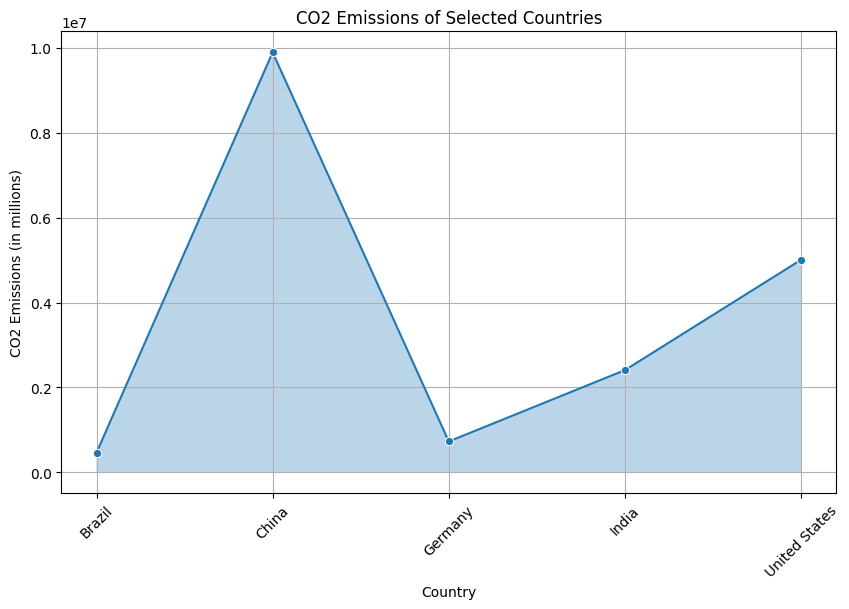

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
url = '/content/Expt-2-world-data-2023 (1).csv'
df = pd.read_csv(url)

# Convert GDP and CO2 Emissions columns to numeric (remove commas and currency symbols)
df['GDP'] = df['GDP'].str.replace('[\$,]', '', regex=True).astype(float)
df['Co2-Emissions'] = df['Co2-Emissions'].str.replace('[\$,]', '', regex=True).astype(float)

# Select a few countries for visualization
countries = ['United States', 'China', 'India', 'Germany', 'Brazil']
filtered_df = df[df['Country'].isin(countries)]

# Line Chart: GDP comparison
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df, x='Country', y='GDP', marker='o')
plt.title('GDP Comparison of Selected Countries')
plt.xlabel('Country')
plt.ylabel('GDP (in trillions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Area Chart: CO2 Emissions comparison
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df, x='Country', y='Co2-Emissions', marker='o')
plt.fill_between(filtered_df['Country'], filtered_df['Co2-Emissions'], alpha=0.3)
plt.title('CO2 Emissions of Selected Countries')
plt.xlabel('Country')
plt.ylabel('CO2 Emissions (in millions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


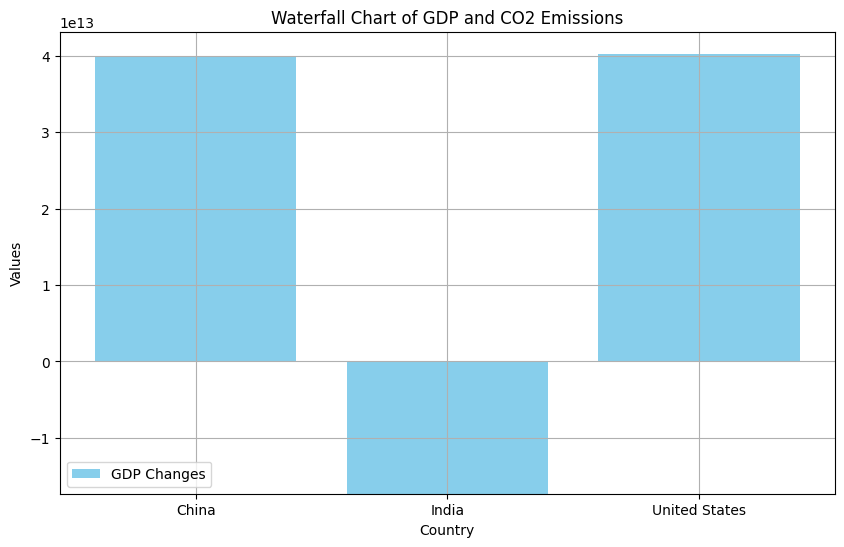

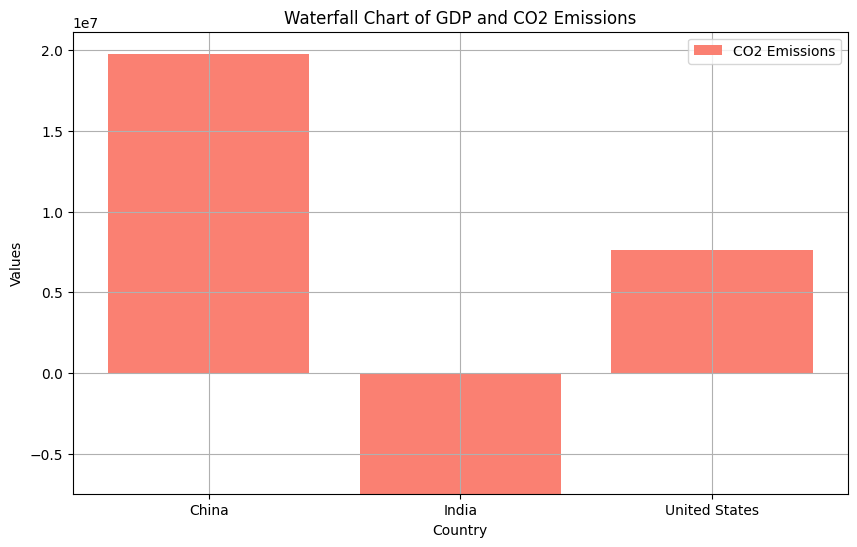

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the CSV file into a DataFrame
url = '/content/Expt-2-world-data-2023 (1).csv'
df = pd.read_csv(url)

# Clean up data for GDP and Co2 Emissions
df['Co2-Emissions'] = df['Co2-Emissions'].str.replace('[\$,]', '', regex=True).astype(float)
# Make sure to convert GDP to numeric as well
df['GDP'] = df['GDP'].str.replace('[\$,]', '', regex=True).astype(float) # Convert GDP to numeric

# Select a few countries for the waterfall chart
waterfall_countries = ['United States', 'China', 'India']
waterfall_df = df[df['Country'].isin(waterfall_countries)]

# Prepare data for waterfall chart
gdp_values = waterfall_df['GDP'].values
co2_values = waterfall_df['Co2-Emissions'].values
countries = waterfall_df['Country'].values

# Calculate the changes in values
changes1 = np.append(gdp_values[0], np.diff(gdp_values))
changes2 = np.append(co2_values[0], np.diff(co2_values))


# Plot waterfall chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(countries, changes1, color='skyblue', label='GDP Changes')
ax.bar(countries, gdp_values, bottom=changes1, color='skyblue', label='')


plt.title('Waterfall Chart of GDP and CO2 Emissions')
plt.xlabel('Country')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Plot waterfall chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(countries, changes2, color='salmon', label='')
ax.bar(countries, co2_values, bottom=changes2, color='salmon', label='CO2 Emissions')


plt.title('Waterfall Chart of GDP and CO2 Emissions')
plt.xlabel('Country')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Load the dataset
url = '/content/Expt-2-world-data-2023 (1).csv'  # Update this with the path to your file
df = pd.read_csv(url)

# Clean up data
df['GDP'] = df['GDP'].str.replace('[\$,]', '', regex=True).astype(float)
df['Population'] = df['Population'].str.replace(',', '').astype(float)

# Select a subset of countries for the treemap
countries = ['United States', 'China', 'India', 'Germany', 'Brazil']
filtered_df = df[df['Country'].isin(countries)]

# Create the treemap
fig = px.treemap(filtered_df, path=['Country'], values='GDP',
                 color='Population', hover_data=['GDP'],
                 color_continuous_scale='RdBu',
                 title="Treemap of GDP and Population")
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Load the dataset
url = '/content/Expt-2-world-data-2023 (1).csv'  # Update this with the path to your file
df = pd.read_csv(url)

# Clean up GDP data
df['GDP'] = df['GDP'].str.replace('[\$,]', '', regex=True).astype(float)

# Select a subset of countries for the donut chart
countries = ['United States', 'China', 'India', 'Germany', 'Brazil']
filtered_df = df[df['Country'].isin(countries)]

# Create the donut chart
fig = px.pie(filtered_df, values='GDP', names='Country', hole=0.3,
             title="GDP Proportion of Selected Countries",
             labels={'GDP': 'GDP in USD'})
fig.show()


In [ ]:
import plotly.express as px

# Load the dataset
url = '/content/Expt-2-world-data-2023 (1).csv'  # Update this with the path to your file
df = pd.read_csv(url)
# Clean up Population data
df['Population'] = df['Population'].str.replace(',', '').astype(float)

# Select a subset of countries for the funnel chart
funnel_countries = ['United States', 'China', 'India', 'Germany', 'Brazil']
funnel_df = df[df['Country'].isin(funnel_countries)]

# Create the funnel chart
fig = px.funnel(funnel_df, x='Population', y='Country',
                title="Population Funnel of Selected Countries",
                labels={'Population': 'Population Count'})
fig.show()
